# Python实现OLS

OLS实现多元线性回归

$$
\hat{\theta}=(X^TX)^{-1}X^Ty
$$

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
# 随便生成一组向量做测试
X:np.ndarray=np.arange(11)
X=X[:,np.newaxis]
X.shape

(11, 1)

In [3]:
y:np.ndarray=X.flatten()+np.random.randn(11)+np.random.randint(11)

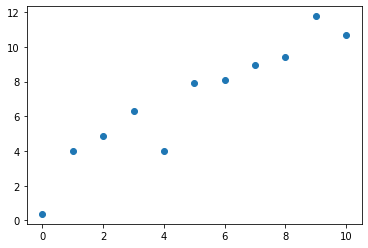

In [4]:
plt.scatter(X.flatten(),y)

In [2]:
# 仿照scikit-learn设计一个OLS的机器学习算法类
class OLS:

    def __init__(self):
        self.theta=None
        self._intercept=None 
        self._coef=None

    def fit(self,X:np.ndarray,y:np.ndarray):
        intercept=np.ones(X.shape[0])
        X=np.c_[intercept,X]

        theta=np.linalg.inv(X.T@X)@X.T@y

        self.theta=theta
        self._intercept=theta[0]
        self._coef=theta[1:]

        return self

    def predict(self,X:np.ndarray):

        intercept=np.ones(X.shape[0])
        X=np.c_[intercept,X]

        y=X@self.theta

        return y

    def score(self,X:np.ndarray,y:np.ndarray):
        # R^2

        y_pred=self.predict(X)

        ssr=np.sum((y_pred-y.mean())**2)
        sst=np.sum((y-y.mean())**2)

        return ssr/sst


In [6]:
ols=OLS()
ols.fit(X,y)
print(ols._coef)
print(ols._intercept)      


[0.96142536]
2.1345369531123697


In [7]:
ols.score(X,y)

0.8845609379573612

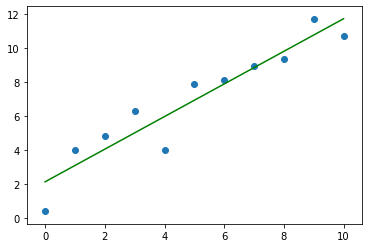

In [8]:
y_pred=ols.predict(X)
plt.plot(X.flatten(),y_pred,c='g')
plt.scatter(X.flatten(),y)



In [3]:
df:pd.DataFrame=pd.read_csv('car.csv')
df=df.dropna() # 某个特征存在一个缺失值，直接放弃
# df.head()


In [4]:
from sklearn.model_selection import train_test_split

df=df.dropna()
X=df.iloc[:,3:].values
y=df.iloc[:,2].values

X_train,X_test,y_train,y_test=train_test_split(
    X,y,random_state=2020
)



In [5]:
ols=OLS()
ols.fit(X_train,y_train)
print(ols._coef)
print(ols._intercept)


[-2.38821286e-04  4.59411085e-03 -1.41757757e+00  1.01061796e+00
 -1.12076071e-02  2.74820344e-03 -7.51305286e-01]
68.1469135178578


In [ ]:
ols.score(X_train,y_trainj)

In [6]:
# 接近R^2接近98%，过拟合不明显
ols.score(X_test,y_test)


0.979717998730328

In [7]:
# 看看scikit-learn是怎么样的

from sklearn.linear_model import LinearRegression

model=LinearRegression().fit(X_train,y_train)
model.score(X_test,y_test)
# 好吧，还是scikit-learn厉害

0.9978901763880217